Lecture: AI I - Basics 

Previous:
[**Chapter 4.1: Data Preparation with scikit-learn**](../04_ml/01_data_preparation.ipynb)

---

# Chapter 4.2: Machine Learning with scikit-learn

- [Decision Tree](#decision-tree)
- [Support Vector Machines](#support-vector-machines)
- [K-Means](#k-means)
- [Usage in Pipelines](#usage-in-pipelines)
- [Which Algorithm Should I Choose?](#which-algorithm-should-i-choose)

[Scikit-learn](https://scikit-learn.org/stable/index.html) offers a wide variety of machine learning algorithms. Since we do not have the time to look at all of them in detail, we will only examine a few algorithms from the areas of classification, regression, and clustering. For additional algorithms, we refer at this point to the [documentation](https://scikit-learn.org/stable/modules/classes.html), the [user guide](https://scikit-learn.org/stable/user_guide.html), and the [tutorials](https://scikit-learn.org/stable/tutorial/index.html). Furthermore, we also cannot go into the underlying mathematics.  


In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets

## Decision Tree
[Decision Trees](https://scikit-learn.org/stable/modules/tree.html#tree) are a supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules derived from the features.  

__Advantages:__  
- Easy to understand and interpret  
- Almost no data preprocessing required  

__Disadvantages:__  
- May not generalize well (overfitting)  
- Decision trees are often very unstable, as small changes in the data may result in a completely different tree  

### Classification with Decision Trees
The [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) is capable of performing multi-class classification on a dataset. To do this, the `fit()` method only needs to be called on the object with the data and labels.  


In [2]:
from sklearn import tree
iris = datasets.load_iris()

dt_clf = tree.DecisionTreeClassifier()
dt_clf.fit(iris.data, iris.target)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


Afterwards, it is possible to make predictions.  


In [3]:
dt_clf.predict([[5.1 , 3.4, 1.3, 0.3]])

array([0])

In [4]:
dt_clf.predict([[6.5, 3.2 , 5.2 , 1.7],])

array([1])

In [5]:
dt_clf.predict([[6.4, 2.7, 5.3, 2.4]])

array([2])

To visualize the decision tree, the function [plot_tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html#sklearn.tree.plot_tree) can be used.  


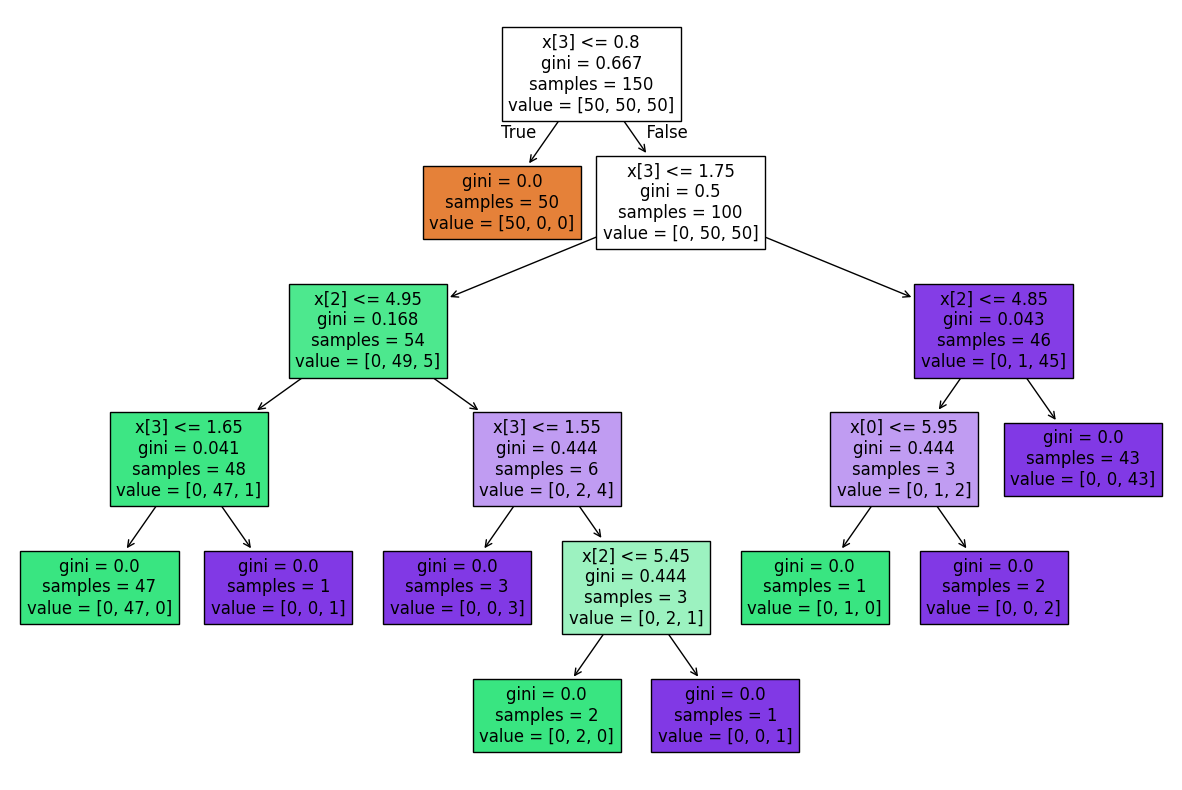

In [6]:
plt.figure(figsize=(15, 10))
_ = tree.plot_tree(dt_clf, filled=True)

Of course, the decision tree can also be parameterized. For example, the maximum depth of the tree can be specified with the parameter `max_depth`, and the function for measuring the quality of a split can be defined with the parameter `criterion`. Depending on the selected parameters, a different decision tree will be produced.  


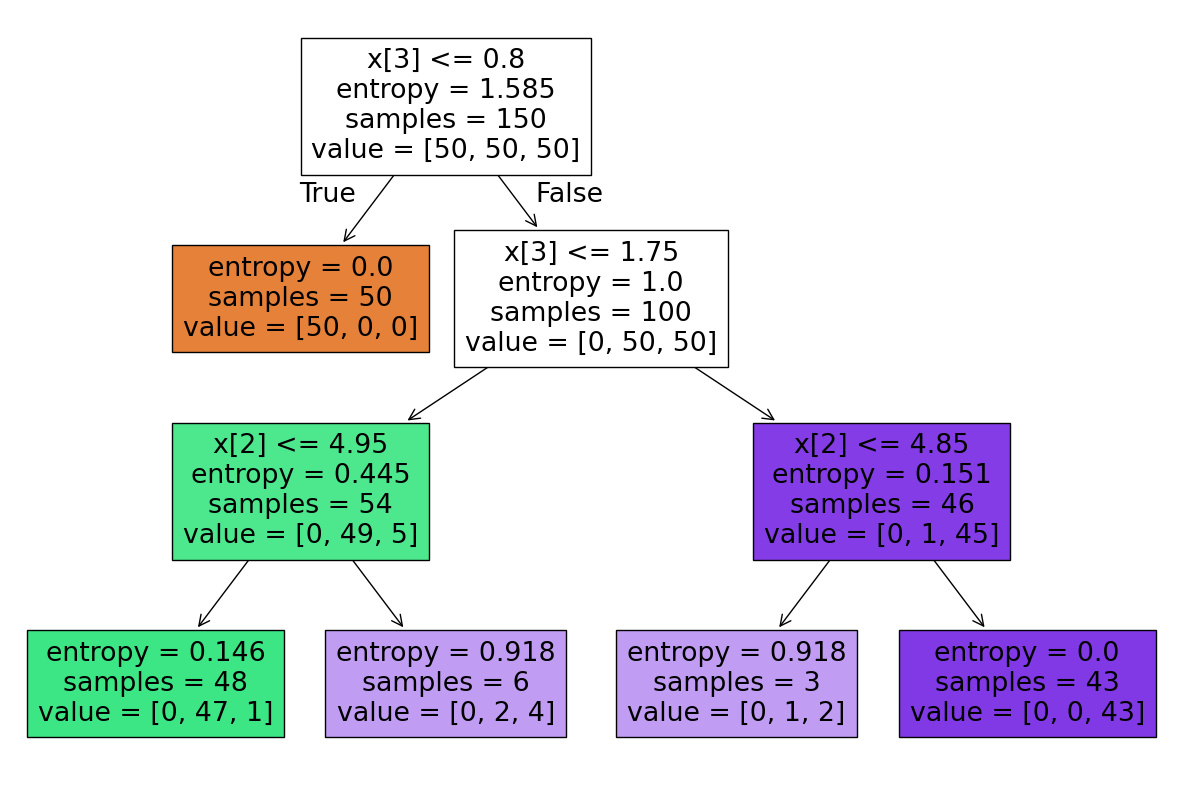

In [7]:
different_dt_clf = tree.DecisionTreeClassifier(max_depth=3, criterion='entropy')
different_dt_clf.fit(iris.data, iris.target)

plt.figure(figsize=(15, 10))
_ = tree.plot_tree(different_dt_clf, filled=True)

### Regression with Decision Trees
Decision Trees can also be applied to regression problems. For this, sklearn provides the class [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor).  


In [8]:
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

In [9]:
# Fit two regression models
regr_1 = tree.DecisionTreeRegressor(max_depth=2).fit(X, y)
regr_2 = tree.DecisionTreeRegressor(max_depth=5).fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

/tmp/ipykernel_9621/3012227454.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


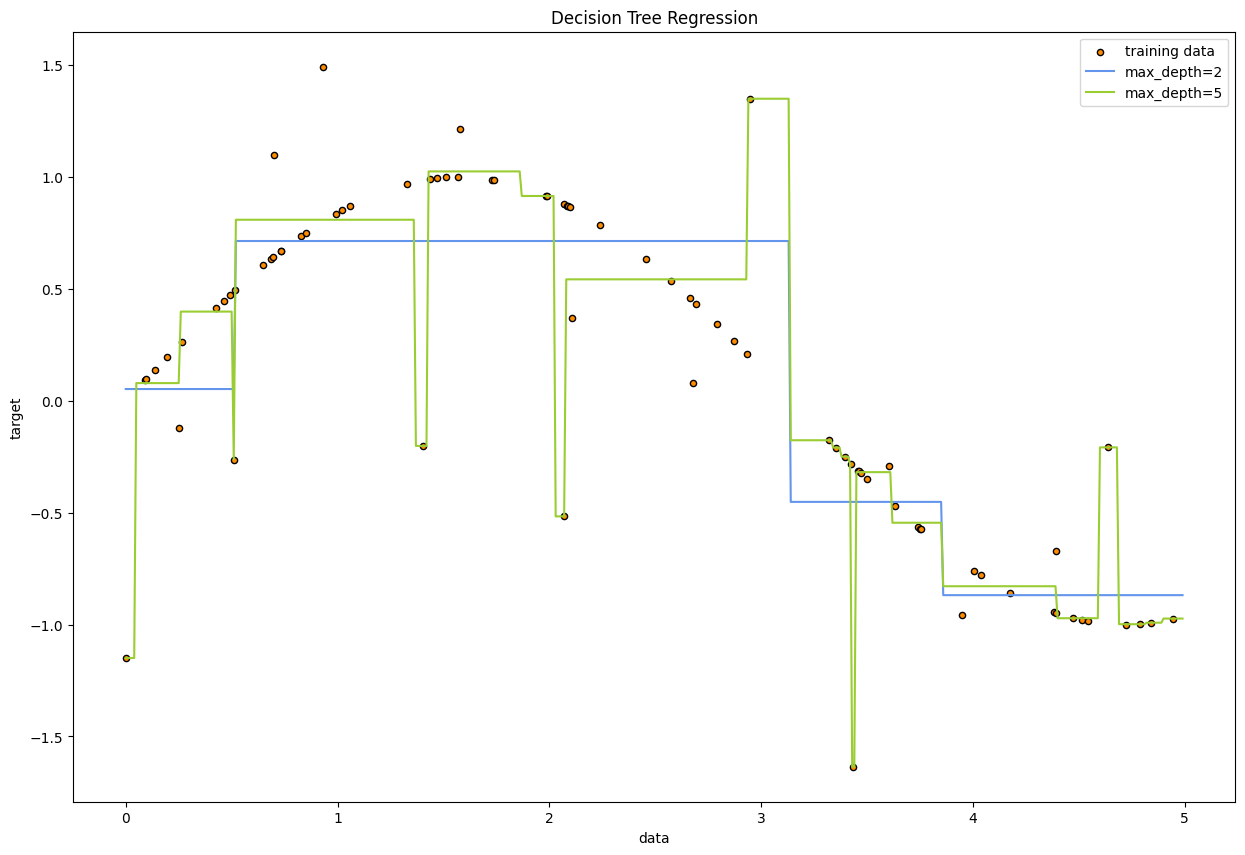

In [10]:
fig, ax = plt.subplots(figsize=(15, 10))

ax.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="training data")
ax.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2")
ax.plot(X_test, y_2, color="yellowgreen", label="max_depth=5")

ax.set(
    title="Decision Tree Regression",
    xlabel="data",
    ylabel="target",
)
ax.legend()
fig.show()

__Exercises:__  
<details>
<summary>a) Which regressor models the data better and why?</summary>
The regressor with a maximum depth of 2 models the data better, because the deeper tree overfits.  
</details>

<details>
<summary>b) What could be a problem with the Decision Tree Regressor?</summary>
The Decision Tree Regressor does not represent a continuous space. Therefore, it may only be of limited use for many regression problems.  
</details>


The decision tree for regression problems can also be visualized using the `plot_tree` function.  


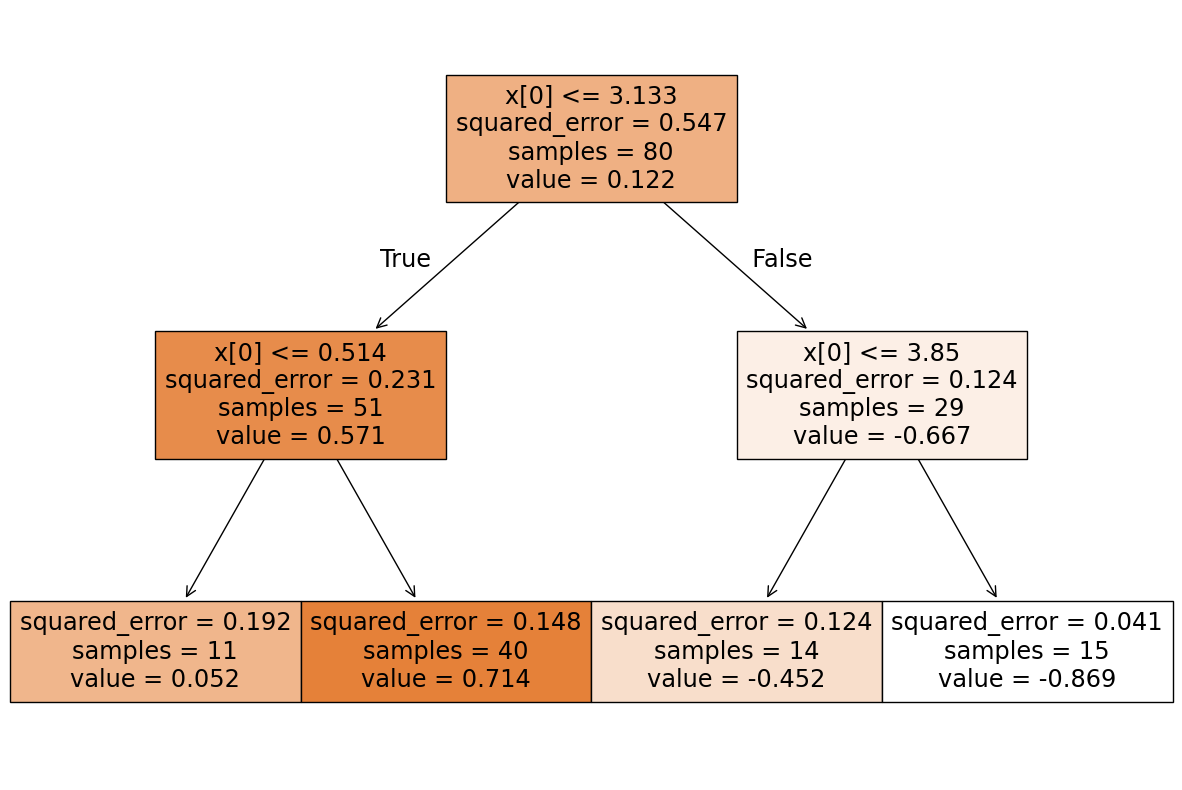

In [11]:
plt.figure(figsize=(15, 10))
_ = tree.plot_tree(regr_1, filled=True)

The regressor can also be adjusted with various parameters. For example, with `min_samples_leaf` you can specify how many data points must be in a leaf of the tree at minimum.  


/tmp/ipykernel_9621/3614895325.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


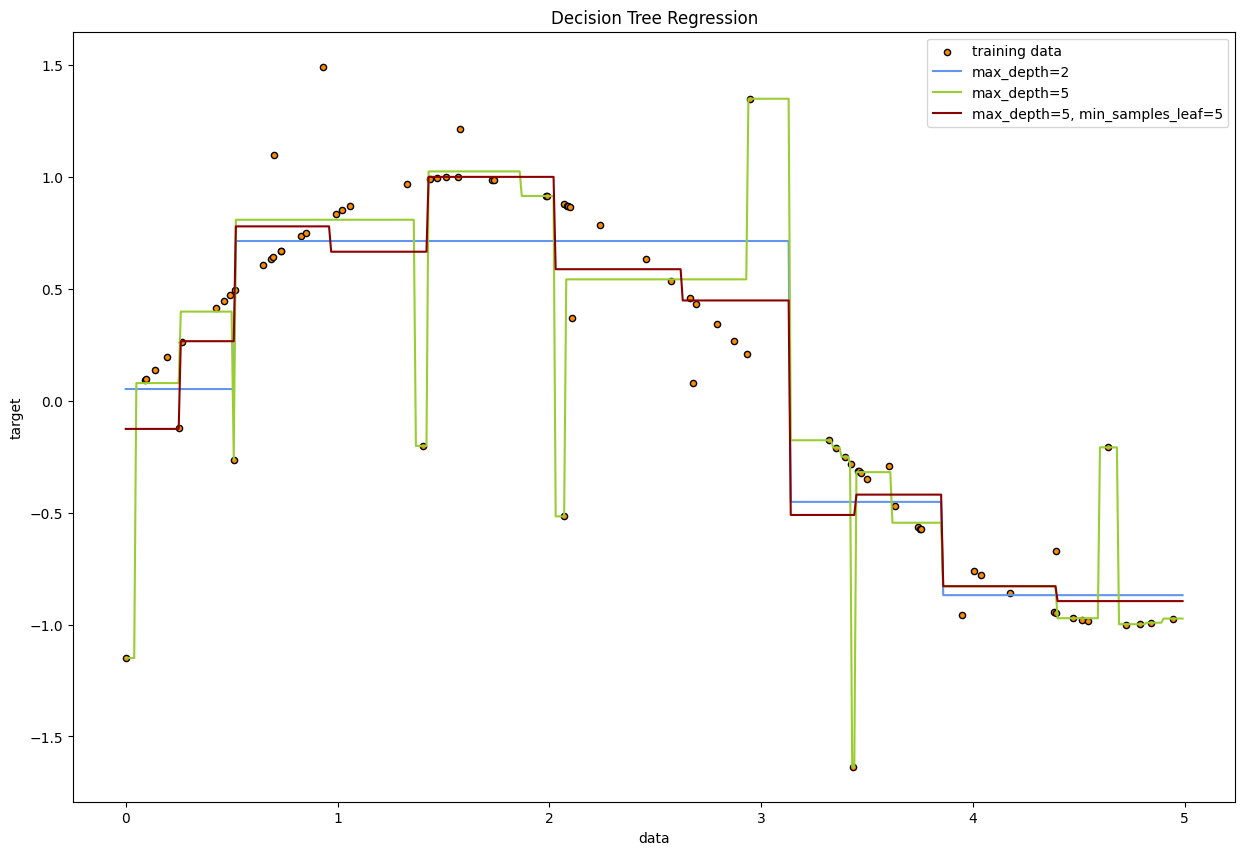

In [12]:
regr_3 = tree.DecisionTreeRegressor(max_depth=5, min_samples_leaf=5).fit(X, y)
y_3 = regr_3.predict(X_test)

fig, ax = plt.subplots(figsize=(15, 10))

ax.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="training data")
ax.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2")
ax.plot(X_test, y_2, color="yellowgreen", label="max_depth=5")
ax.plot(X_test, y_3, color="darkred", label="max_depth=5, min_samples_leaf=5")

ax.set(
    title="Decision Tree Regression",
    xlabel="data",
    ylabel="target",
)
ax.legend()
fig.show()

---

Lecture: AI I - Basics 

Exercise: [**Exercise 4.2: Machine Learning with scikit-learn**](../04_ml/exercises/02_machine_learning.ipynb)

Next: [**Chapter 4.3: Evaluation with scikit-learn**](../04_ml/03_evaluation.ipynb)